<a href="https://colab.research.google.com/github/Cordier-Info/exemples/blob/master/Google_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problèmes Google :

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Cordier-Info/exemples/blob/master/Google_problem.ipynb)

En 2004, Google a mené une campagne de recrutement un peu originale en affichant le panneau publicitaire ci-dessous:

![pancarte](https://github.com/Cordier-Info/exemples/blob/master/images/pancarte.jpg?raw=1)

## Premier problème :

![pb1](https://github.com/Cordier-Info/exemples/blob/master/images/Google.jpg?raw=1)

### Essayons de déterminer la valeur de $e$ avec une précision suffisante :

In [3]:
import math
print(math.e)
len(str(math.e))-1 #-1 pour le  "."

2.718281828459045


16

Pour s'affranchir de la limitation des 64 bits du codage des flottants (mantisse de 52 bits $\rightarrow$ 53 bits significatifs avec le 1 avant la virgule, soit 16 chiffres en représentation décimale), on va tiliser le module `decimal` qui permet une précision arbitraire.

In [2]:
from decimal import *
nb_cs = 1001
getcontext().prec = nb_cs

In [ ]:
1/3

0.3333333333333333

In [ ]:
Decimal(1)/Decimal(3)

Decimal('0.33333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333

Utilisons la définition de $e$ comme somme d'une série pour l'approximer à la précision souhaitée :
$$e = \sum_{n=0}^\infty \frac{1}{n!}$$

In [9]:
def fact(n) :
    f = 1
    for i in range(1,n+1) :
        f *= i
    return f
fact(5)

120

In [10]:
e = 1
n = 1000
for i in range(1,n+1):
    e_old = e
    e += Decimal(1)/Decimal(fact(i))
    # pour s'arrêter quand la précision est atteinte
    if e == e_old : 
        print("nombre d'itérations :",i)
        break
print(e)

nombre d'itérations : 451
2.718281828459045235360287471352662497757247093699959574966967627724076630353547594571382178525166427427466391932003059921817413596629043572900334295260595630738132328627943490763233829880753195251019011573834187930702154089149934884167509244761460668082264800168477411853742345442437107539077744992069551702761838606261331384583000752044933826560297606737113200709328709127443747047230696977209310141692836819025515108657463772111252389784425056953696770785449969967946864454905987931636889230098793127736178215424999229576351482208269895193668033182528869398496465105820939239829488793320362509443117301238197068416140397019837679320683282376464804295311802328782509819455815301756717361332069811250996181881593041690351598888519345807273866738589422879228499892086805825749279610484198444363463244968487560233624827041978623209002160990235304369941849146314093431738143640546253152096183690888707016768396424378140592714563549061303107208510383750510115747704171898610687

### Aparté avec $\pi$ :

Obtention des décimales de π avec la formule BBP :<br>
$$ \pi = \sum_{k=0}^\infty \frac{1}{16^k}\left(\frac{4}{8k+1}-\frac{2}{8k+4}-\frac{1}{8k+5}-\frac{1}{8k+6}\right)$$

In [15]:
%%time
pi = 0
n = 100000
for k in range(0,n):
    pi_old = pi
    pi += (Decimal(4)/(8*k+1)-Decimal(2)/(8*k+4)-Decimal(1)/(8*k+5)-Decimal(1)/(8*k+6))/16**k
    if pi_old == pi :
        print("nombre d'itérations :",k)
        break
print(pi)

nombre d'itérations : 826
3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132000568127145263560827785771342757789609173637178721468440901224953430146549585371050792279689258923542019956112129021960864034418159813629774771309960518707211349999998372978049951059731732816096318595024459455346908302642522308253344685035261931188171010003137838752886587533208381420617177669147303598253490428755468731159562863882353787593751957781857780532171226806613

Pour trouver le nombre de décimales sur le mur de la D123 :

In [12]:
def position(pi,chaine) :
    try :
        return str(pi).index(chaine)+len(chaine)-2
    except ValueError :
        print("La chaîne {} n'a pas été trouvée.".format(chaine))
position(pi,'092186') # test

426

Une série convergeant plus rapidement (l'algorithme Chudnovsky) :

In [14]:
%%time
invpi = 0
n = 10000
for i in range(0,n):
    invpi_old = invpi
    invpi += Decimal(12)*(-1)**i*fact(6*i)*(13591409+545140134*i)/(fact(3*i)*fact(i)**3*640320**(3*i+Decimal(3)/2))
    if invpi == invpi_old :
        print("nombre d'itérations :",i)
        break
pi = 1/invpi
print(pi)

nombre d'itérations : 71
3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094330572703657595919530921861173819326117931051185480744623799627495673518857527248912279381830119491298336733624406566430860213949463952247371907021798609437027705392171762931767523846748184676694051320005681271452635608277857713427577896091736371787214684409012249534301465495853710507922796892589235420199561121290219608640344181598136297747713099605187072113499999983729780499510597317328160963185950244594553469083026425223082533446850352619311881710100031378387528865875332083814206171776691473035982534904287554687311595628638823537875937519577818577805321712268066130

Comparaison avec une méthode de Monte-Carlo :

pi_MC = 3.1304
pi_BBP = 3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300

(2.5, 4.0)

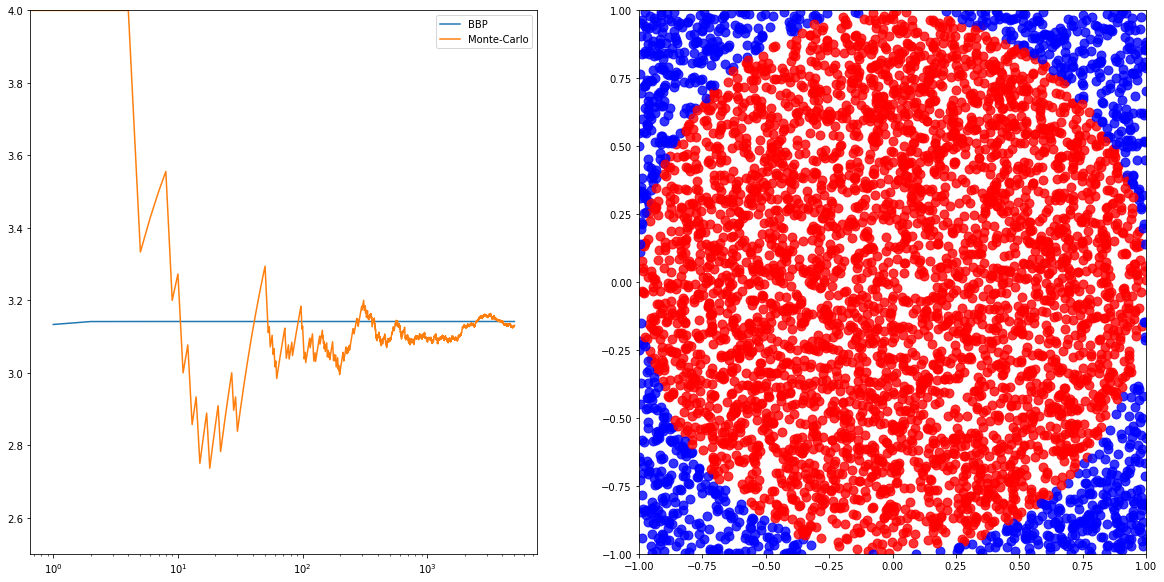

In [16]:
import matplotlib.pyplot as plt
from random import random

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10))
n = 5000
compte = 0
pi = 0
X,Y1,Y2 = [],[],[]
for k in range(0,n) :
    X.append(k+1)
    pi += (Decimal(4)/(8*k+1)-Decimal(2)/(8*k+4)-Decimal(1)/(8*k+5)-Decimal(1)/(8*k+6))/16**k
    Y1.append(pi)
    x = (random()-0.5)*2
    y = (random()-0.5)*2
    ax2.set_xlim(-1,1)
    ax2.set_ylim(-1,1)
    if x**2+y**2 < 1 :
        compte += 1
        ax2.scatter(x,y,marker='o',color='red',s=80,alpha=0.8)
    else :
        ax2.scatter(x,y,marker='o',color='blue',s=80,alpha=0.8)
    Y2.append(compte/(k+1)*4)
print("pi_MC =",compte/(k+1)*4)
print("pi_BBP =",pi)
ax1.semilogx(X,Y1,Y2)
ax1.legend(['BBP','Monte-Carlo'])
ax1.set_ylim(2.5,4)

### Tester la primalité :

In [17]:
def premier(n) :
    b = True
    for d in range(2,int(math.sqrt(n))+1) :
        if n%d == 0 :
            b = False
            break
    return b

In [18]:
for i in range(2000000000,2000000100) :
    if premier(i) :
        print(i)

2000000011
2000000033
2000000063
2000000087
2000000089
2000000099


In [19]:
%%time
premier(9999999967)

CPU times: user 14.2 ms, sys: 0 ns, total: 14.2 ms
Wall time: 15 ms


True

### Plus qu'à parcourir $e$ à la quête de notre premier de 10 chiffres :

In [20]:
%%time
nb = 10 # nb de chiffres du nombre premier
for i in range(0,nb_cs) :
    n = str(e).replace('.','')[i:nb+i]
    if premier(int(n)) :
        print("Premier nombre premier de {} chiffres dans e : {}".format(nb,n))
        print("Il commence au {}ème rang derrière la virgule".format(i))
        break

Premier nombre premier de 10 chiffres dans e : 7427466391
Il commence au 99ème rang derrière la virgule
CPU times: user 24.8 ms, sys: 1 ms, total: 25.8 ms
Wall time: 26.3 ms


Le premier problème nous emmenait donc à l'adresse :
**7427466391.com**

On y trouvait un second problème...

 ---

## Second problème

<img src="https://github.com/Cordier-Info/exemples/blob/master/images/Pb2.jpg?raw=1" alt="pb_2" width="400">

On reconnait les chiffres consécutifs de $e$. Qu'ont-ils en commun ?

In [ ]:
def somme(chaine) :
    return sum(int(c) for c in chaine)

In [ ]:
for chaine in ['7182818284','8182845904','8747135266','7427466391'] :
    print(somme('7182818284'))

49
49
49
49


In [ ]:
def f(k) :
    c = 0
    for i in range(0,nb_cs) :
        n = str(e).replace('.','')[i:10+i]
        if somme(n) == 49 :
            c += 1
        if c == k :
            return n
            break

In [ ]:
for i in range(1,6) :
    print("f({}) = {}".format(i,f(i)))

f(1) = 7182818284
f(2) = 8182845904
f(3) = 8747135266
f(4) = 7427466391
f(5) = 5966290435


On découvrait alors ce message :

> Congratulations. Nice work. Well done. Mazel tov. You've made it to Google Labs and we are glad you are here.
One thing we learned while building Google is that it's easier to find what you're looking for if it comes looking for you. What we're looking for are the best engineers in the world. And here you are.
>
> As you can imagine, we get many, many resumes every day, so we developed this little process to increase the signal to noise ratio. We apologize for taking so much of your time just to ask you to consider working with us. We hope you'll feel it was worthwhile when you look at some of the interesting projects we're developing right now. You'll find links to more information about our efforts below, but before you get immersed in machine learning and genetic algorithms, please send your resume to us at problem-solver@google.com.
>
> We're tackling a lot of engineering challenges that may not actually be solvable. If they are, they'll change a lot of things. If they're not, well, it will be fun to try anyway. We could use your big, magnificent brain to help us find out.